# **Data Analysis Through Pyspark**

In [1]:
#Importing pyspark
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 56.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=f2947d2b71b1f4cb99a164c69fde089ba68bc31c703d7a022f3608e091b6f411
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
#Initializing SparkSession
from pyspark.sql.session import SparkSession


In [4]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
# #Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)



/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


## Importing Dataset

In [5]:
# Importing cleaned dataset to pyspark
df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/csvd.csv")
df.show(5)

+---------------+----+-------------+----+----------+----------+----------+------------+-----------+-----------+
|           name| age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+---------------+----+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  MichaelPhelps|23.0|United States|2008|2008-08-24|  Swimming|         8|           0|          0|          8|
|  MichaelPhelps|19.0|United States|2004|2004-08-29|  Swimming|         6|           0|          2|          8|
|  MichaelPhelps|27.0|United States|2012|2012-08-12|  Swimming|         4|           2|          0|          6|
|NatalieCoughlin|25.0|United States|2008|2008-08-24|  Swimming|         1|           2|          3|          6|
|   AlekseyNemov|24.0|       Russia|2000|2000-10-01|Gymnastics|         2|           1|          3|          6|
+---------------+----+-------------+----+----------+----------+----------+------------+-----------+-----

## Write PySpark code to print the Olympic Sports/games in the dataset.

In [25]:
# Finnding all unique games present in the dataset
df.select('sports').distinct().show(49)

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
|          Equestrian|
|            Shooting|
|              Diving|
|            Skeleton|
|         Ski Jumping|
|     Nordic Combined|
|           Wrestling|
|       Speed Skating|
|        Table Tennis|
|           Taekwondo|
|            Canoeing|
|       Weightlifting|
|           Waterpolo|
|            Baseball|
|   Modern Pentathlon|
|        Snowboarding|
|           Bobsleigh|
|             Cycling|
|Cross Country Skiing|
|          Volleyball|
|          

##**Plotting the total number of medals in  each Olympic Sport/game**

In [9]:
dt=df.toPandas() # Converting spark dataframe to pandas dataframe
sd=dt[["sports", "total_medal"]].groupby(['sports'], as_index=False).sum().sort_values(by='total_medal', ascending=False) 
# calculating total medals by groupping with sport and sorting the result based on the total number of medals.
sd 

,sports,total_medal
38,Swimming,694
2,Athletics,684
29,Rowing,464
10,Canoeing,310
13,Cycling,294
20,Gymnastics,265
48,Wrestling,234
16,Fencing,233
21,Handball,226
22,Hockey,221


#Plotting sports data

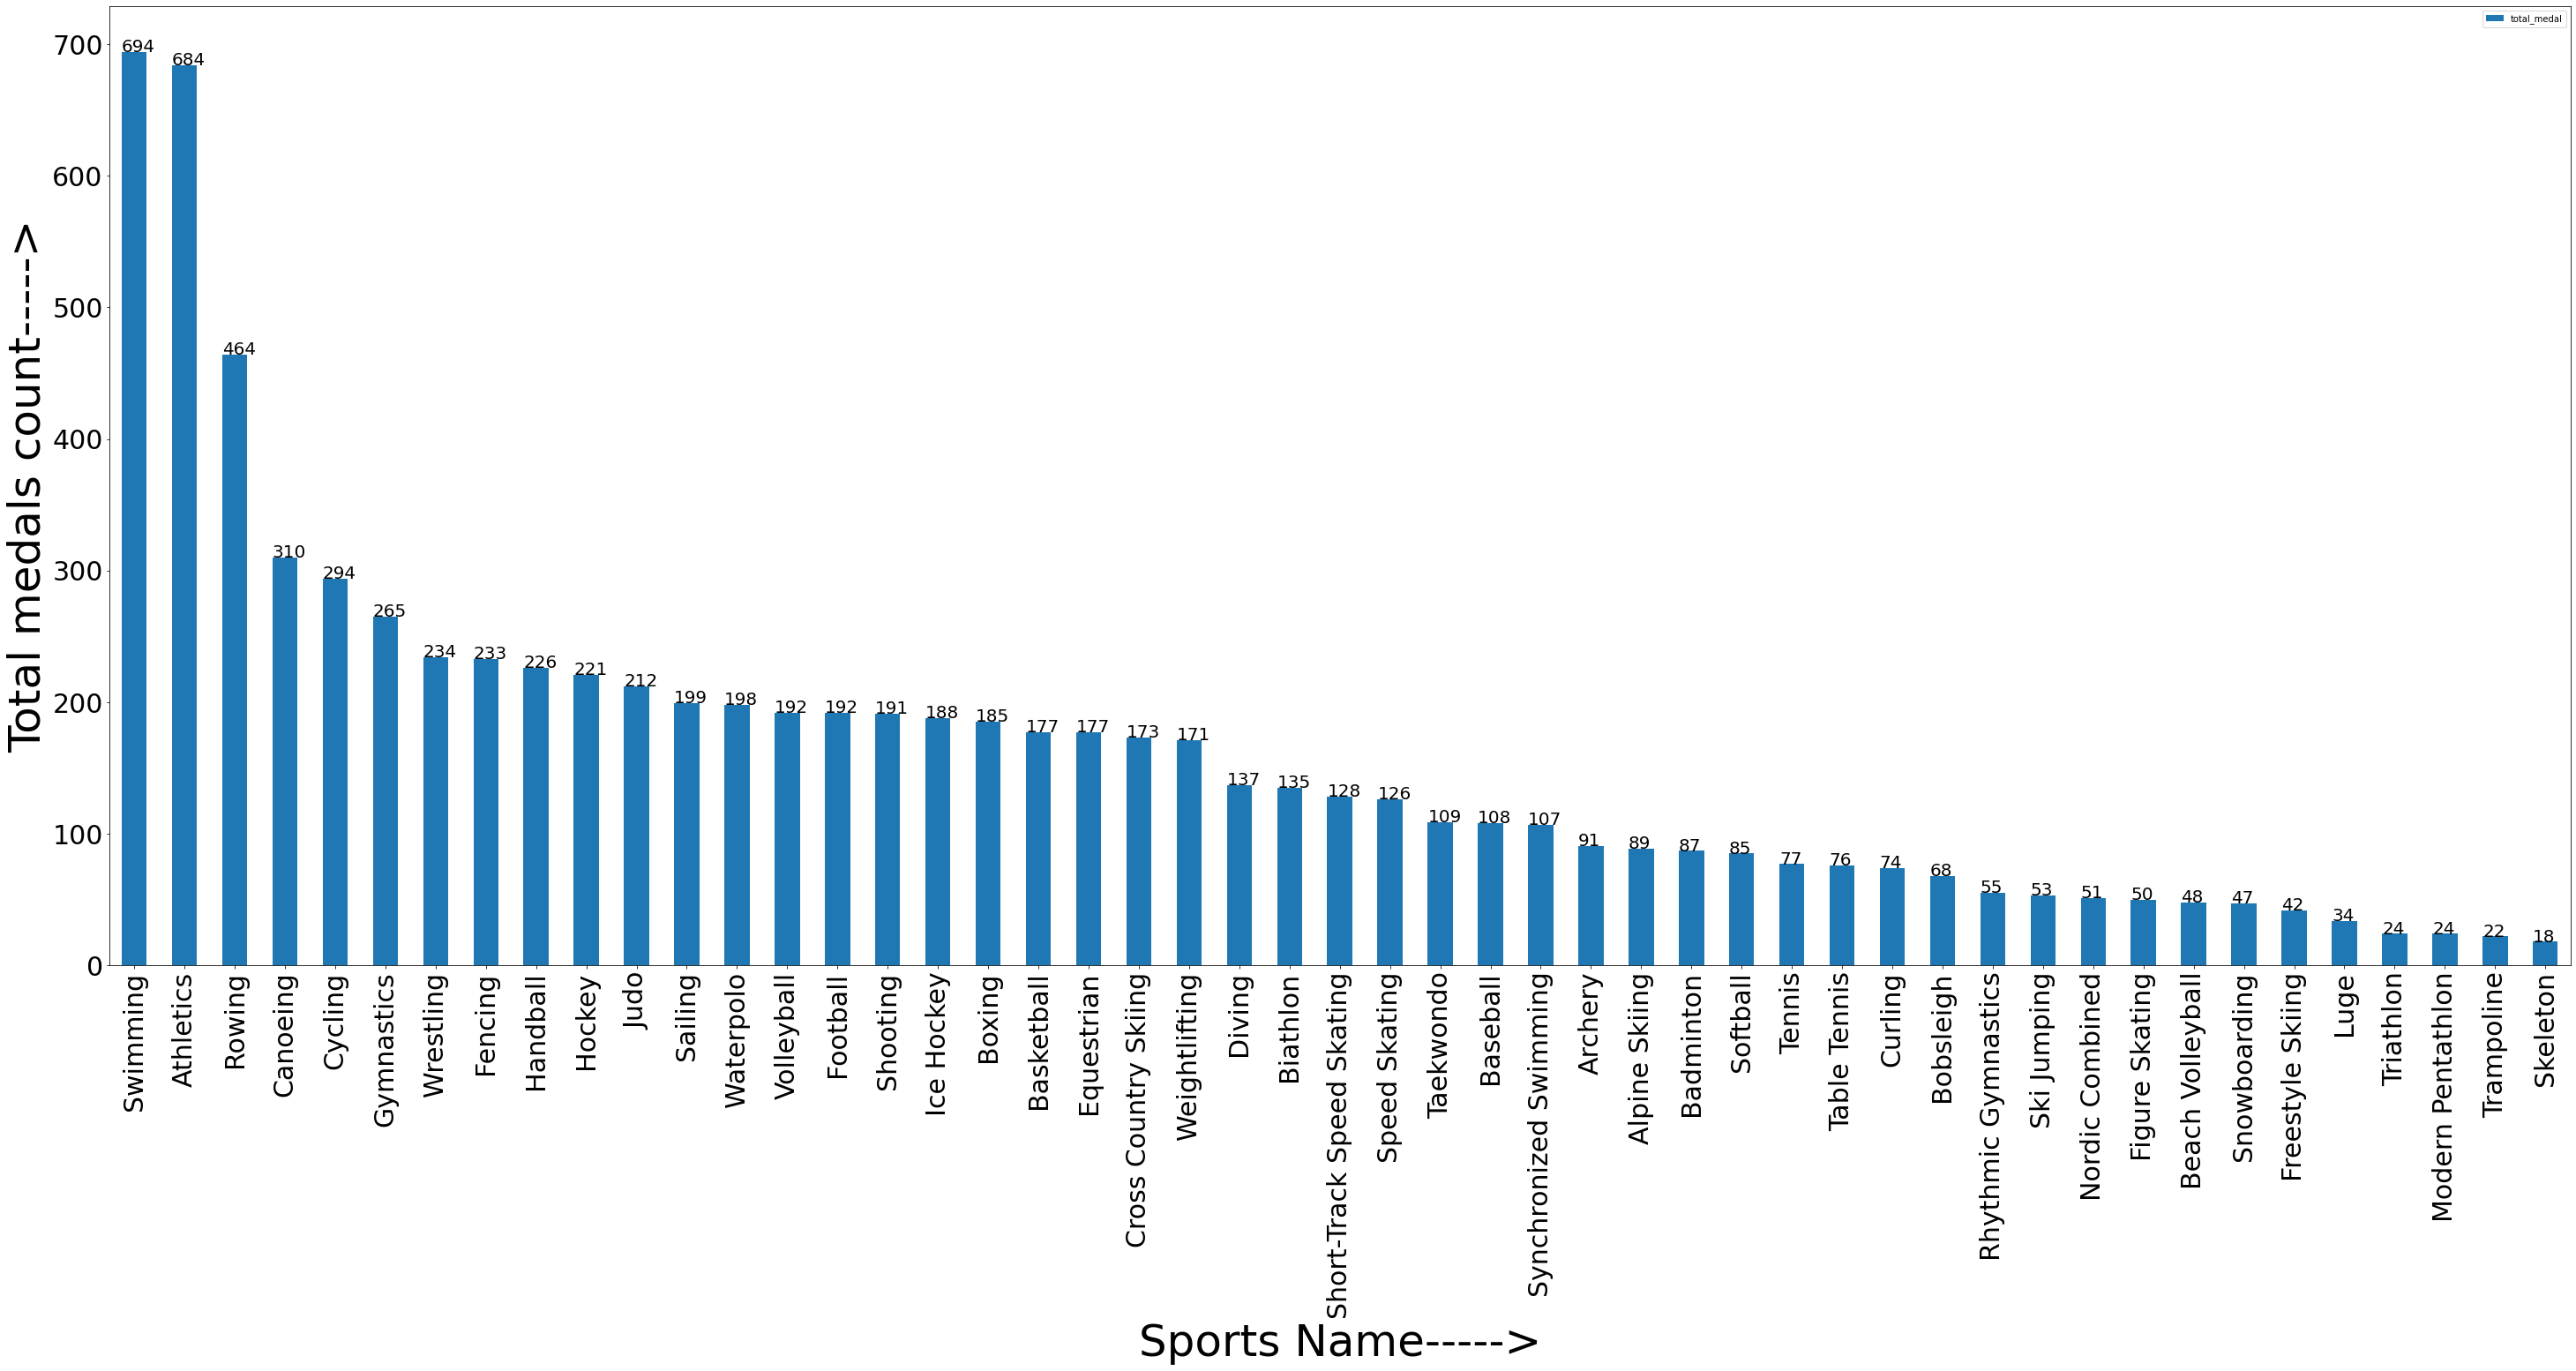

In [14]:
import matplotlib.pyplot as plt #importing matplot library to plot pandas dataframe
ax=sd.plot(x="sports", y="total_medal", kind="bar", rot=90, fontsize=30,figsize=(50,20)) # Initializing x-axis and y-axis
for p in ax.patches: #setting data lables
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()), fontsize=20)
plt.ylabel('Total medals count----->',fontsize=50) #setting axis names
plt.xlabel('Sports Name----->',fontsize=50)
plt.show()    


# Sorting the dataframe based on the total number of medals.

In [16]:
df.sort(['total_medal'],ascending = False).show()

+-------------------+----+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|               name| age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+-------------------+----+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      MichaelPhelps|23.0|United States|2008|2008-08-24|            Swimming|         8|           0|          0|          8|
|      MichaelPhelps|19.0|United States|2004|2004-08-29|            Swimming|         6|           0|          2|          8|
|      MichaelPhelps|27.0|United States|2012|2012-08-12|            Swimming|         4|           2|          0|          6|
|    NatalieCoughlin|25.0|United States|2008|2008-08-24|            Swimming|         1|           2|          3|          6|
|       AlekseyNemov|24.0|       Russia|2000|2000-10-01|          Gymnastics|         2|           1|          3|     

# Finding the total number of medals won by each country in swimming.

In [15]:
import pyspark.sql.functions as f # importing some functions
from pyspark.sql.functions import col 
df11=df.select('country', 'sports','total_medal') # select country column, sports column and total_medal column
df12=df11.filter(df11["sports"] =='Swimming') # filtering sports column with only swimming  
df13=df12.groupBy("country","sports").sum("total_medal") # groupby country and sports column with sum of total medal
df13.orderBy(f.desc("sum(total_medal)")).show(111) # sort table by sum of total medal



+-------------------+--------+----------------+
|            country|  sports|sum(total_medal)|
+-------------------+--------+----------------+
|      United States|Swimming|             230|
|          Australia|Swimming|             151|
|        Netherlands|Swimming|              46|
|              Japan|Swimming|              41|
|             France|Swimming|              35|
|              China|Swimming|              29|
|            Germany|Swimming|              29|
|             Russia|Swimming|              16|
|              Italy|Swimming|              15|
|       South Africa|Swimming|              11|
|      Great Britain|Swimming|              10|
|            Hungary|Swimming|               9|
|             Sweden|Swimming|               8|
|             Brazil|Swimming|               8|
|           Zimbabwe|Swimming|               7|
|            Ukraine|Swimming|               7|
|            Romania|Swimming|               6|
|             Canada|Swimming|          

## **Calculating the total number of medals won by each country in Skeleton.**

In [17]:
import pyspark.sql.functions as f # importing some functions
from pyspark.sql.functions import col 
df11=df.select('country', 'sports','total_medal') # select country column, sports column and total_medal column
df12=df11.filter(df11["sports"] =='Skeleton') # filtering sportscolumn only with Skeleton game
df13=df12.groupBy("country","sports").sum("total_medal")  # groupby country and sports column with sum of total medal
df13.orderBy(f.desc("sum(total_medal)")).show(111) # sort table by sum of total medal

+-------------+--------+----------------+
|      country|  sports|sum(total_medal)|
+-------------+--------+----------------+
|       Canada|Skeleton|               4|
|United States|Skeleton|               3|
|  Switzerland|Skeleton|               3|
|Great Britain|Skeleton|               3|
|      Germany|Skeleton|               2|
|       Russia|Skeleton|               1|
|      Austria|Skeleton|               1|
|       Latvia|Skeleton|               1|
+-------------+--------+----------------+



##**Calculating the number of medals that the US won yearly.**

In [18]:
import pyspark.sql.functions as f # importing some functions
from pyspark.sql.functions import col 
df11=df.select('country','year','gold_medal','silver_medal','brone_medal','total_medal') # here we select country year and every medal details won by country in this year 
df12=df11.filter(df11["country"] =='United States') # filtering country column with only United States
df13=df12.groupBy("country","year").sum("gold_medal","silver_medal","brone_medal",'total_medal') # Groupby country and year column with sum of all medals
df13.orderBy(f.desc("year")).show(111) # arranging data in descening order by year

+-------------+----+---------------+-----------------+----------------+----------------+
|      country|year|sum(gold_medal)|sum(silver_medal)|sum(brone_medal)|sum(total_medal)|
+-------------+----+---------------+-----------------+----------------+----------------+
|United States|2012|            111|               52|              44|             207|
|United States|2010|             11|               34|              21|              66|
|United States|2008|             93|               75|              61|             229|
|United States|2006|              7|               10|              21|              38|
|United States|2004|             91|               63|              61|             215|
|United States|2002|             11|               35|              12|              58|
|United States|2000|             94|               46|              46|             186|
+-------------+----+---------------+-----------------+----------------+----------------+



##**Find the total number of medals won by each country.**

In [41]:
import pyspark.sql.functions as f # importing some functions
from pyspark.sql.functions import col 
df13=df.groupBy("country").sum('total_medal') # group by country and total medals
df13.orderBy(f.desc("sum(total_medal)")).show(110) # sort the table in descending order by sum of total medal

+--------------------+----------------+
|             country|sum(total_medal)|
+--------------------+----------------+
|       United States|             999|
|              Russia|             639|
|             Germany|             546|
|           Australia|             489|
|               China|             466|
|       Great Britain|             288|
|               Italy|             284|
|              France|             283|
|              Canada|             277|
|         Netherlands|             243|
|         South Korea|             241|
|               Japan|             227|
|              Norway|             163|
|              Brazil|             158|
|               Spain|             152|
|                Cuba|             146|
|              Sweden|             141|
|             Ukraine|             133|
|             Hungary|             120|
|             Romania|             112|
|         Switzerland|              91|
|             Austria|              89|


## Finding, who was the oldest athlete in the olympics and his country

In [24]:
# Grouping name,country and age column
df13=df.groupBy("name","country").max('age')
df13.orderBy(f.desc("max(age)")).limit(1).show() # finding highest age player present in data

+---------+-------+--------+
|     name|country|max(age)|
+---------+-------+--------+
|IanMillar| Canada|    61.0|
+---------+-------+--------+



#### we found Ian Millar named player was oldest athlet in the olympics and he's from Canada.